# Posterior Approximation for a Binomial model

Let the probability density function for binomial distribution: $P(y | n, p) = {n \choose y} p^{y}(1-p)^{(n-y)} $

Where $n$ is the **number of trials**, p **probability of success** and $y$ the **number of successes in $n$ trials**.

We can express this probability density function as an exponential model :

$$P(y | n, \theta) = exp[y \theta - n log(1 + e^{\theta}) + log{n \choose y}] $$

And then express the posterior distribution of $\theta$ for a Binomial model:

$$P(\theta | y, n) \propto P(y | n, \theta) p(\theta) = exp[y \theta - n log(1 + e^{\theta}) + log{n \choose y}] P(\theta)$$


Where $\theta = log(\frac{p}{1 - p})$ and conversely $p = \frac{e^{\theta}}{1 + e^{\theta}}$ 




In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from math import exp

In [3]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    theta = [d[0] for d in data]
    data_frame = pd.DataFrame({'theta': theta})
    return data_frame

def extract_from_file_mh(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    p = [d[1] for d in data]
    data_frame = pd.DataFrame({'p': p})
    return data_frame

def sample(df, by):
    data_frame = pd.DataFrame({'theta': [theta[1] for theta in data2['theta'].items() if theta[0] % 10 == 0]})
    return data_frame
def theta_to_p(theta):
    return exp(theta)/(1 + exp(theta))

def summary_mh(data):
    print("========== Q1 ==========")
    q_25 = np.percentile(data['p'], 25)
    print("Q1 for p parameter {}".format(q_25))
    print("========== Median ==========")
    q_50 = np.percentile(data['p'], 50)
    print("Median for p parameter {}".format(q_50))
    avg = np.mean(data['p'])
    print("========== Mean ==========")
    print("Mean for p parameter {}".format(avg))
    q_75 = np.percentile(data['p'], 75)
    print("========== Q3 ==========")
    print("Q3 for p parameter {}".format(q_75))

def summary_abc(data):
    print("========== Q1 ==========")
    q_25 = np.percentile(data['theta'], 25)
    print("Q1 for theta parameter {}".format(q_25))
    print("Q1 for theta -> p parameter {}".format(theta_to_p(q_25)))
    print("========== Median ==========")
    q_50 = np.percentile(data['theta'], 50)
    print("Median for theta parameter {}".format(q_50))
    print("Median for theta -> p parameter {}".format(theta_to_p(q_50)))
    avg = np.mean(data['theta'])
    print("========== Mean ==========")
    print("Mean for theta parameter {}".format(avg))
    print("Mean for theta -> p parameter {}".format(theta_to_p(avg)))
    q_75 = np.percentile(data['theta'], 75)
    print("========== Q3 ==========")
    print("Q3 for theta parameter {}".format(q_75))
    print("Q3 for theta -> p parameter {}".format(theta_to_p(q_75)))

def plot_p_from_abc(data):
    iters = range(len(data['theta']))
    p = [exp(t)/(1 + exp(t)) for  t in data['theta']]
    fig, ax = plt.subplots()
    ax.set(xlabel='theta', ylabel='p', title='Probability p over iterations')
    ax.plot(iters,p)

def comparaison(data_mh, data_abc):
    fig, axs = plt.subplots(2, 1, figsize=(14,14))
    p_abc = [theta_to_p(t) for t in data_abc["theta"].tolist()]
    p_mh = [t for t in data_mh['p'].tolist()]
    df_mean = pd.DataFrame({"p MH": p_mh , "p ABC" : p_abc})
    axs[0].set_title(label="Normal distribution - mean parameter")
    sns.boxplot(data=df_mean, ax=axs[0])
    p_mh.sort()
    p_abc.sort()
    axs[1].scatter(p_mh, p_abc)
    
    plt.show()


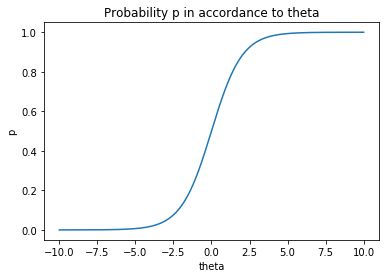

In [4]:
x = np.arange(-10,10, 0.001)
y = [exp(t)/(1 + exp(t)) for  t in x]
fig, ax = plt.subplots()
ax.set(xlabel='theta', ylabel='p',
       title='Probability p in accordance to theta')
ax.plot(x,y)


# First results


### MH result
* sample size : $size=1$
* $p_0 = \frac{e^{10}}{1 + e^{10}} \approx 0.999$
* $y \sim Bin(n = 100, p = \frac{e^{0.2}}{1 + e^{0.2}} \approx 0.55)$
* $\Delta=[0.005]$
* Number of samples: $n=10000$
* $n_{algo} = 200$

In [5]:
FILE_NAME_0 = 'assets/exp0.json'

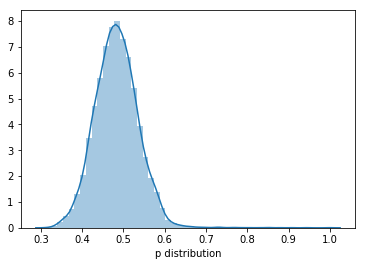

In [6]:
data0 = extract_from_file_mh(FILE_NAME_0)
sns.distplot(data0['p'], axlabel="p distribution")

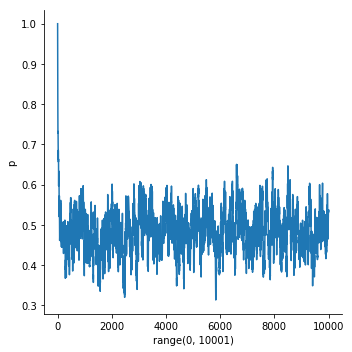

In [7]:
sns.relplot(x=range(len(data0['p'])),y='p', data=data0, kind='line', legend='brief')

In [8]:
summary_mh(data0)

========== Q1 ==========
Q1 for p parameter 0.44858535002261757
========== Median ==========
Median for p parameter 0.4821809477246996
========== Mean ==========
Mean for p parameter 0.4834254696837865
========== Q3 ==========
Q3 for p parameter 0.5160821352469094


### ABC result
* sample size : $size=1$
* $theta_0 = [10]$
* $y \sim Bin(n = 100, p = \frac{e^{0.2}}{1 + e^{0.2}})$
* $\Delta=[0.005]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 200$

In [9]:
FILE_NAME_1 = 'assets/exp1.json'

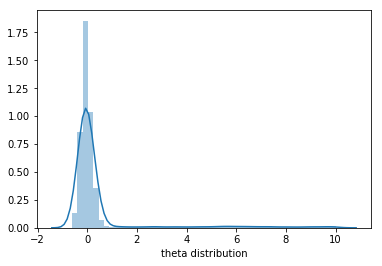

In [10]:
data1 = extract_from_file(FILE_NAME_1)
sns.distplot(data1['theta'], axlabel="theta distribution")

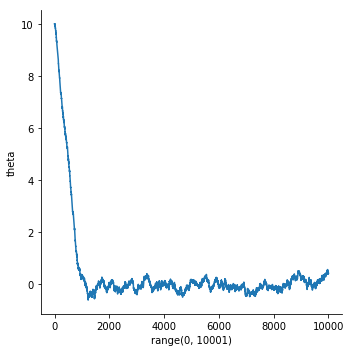

In [11]:
sns.relplot(x=range(len(data1['theta'])),y='theta', data=data1, kind='line', legend='brief')

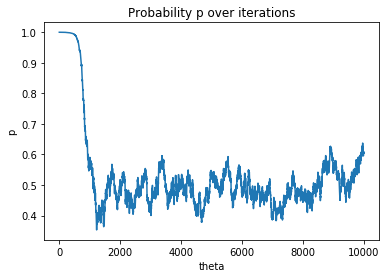

In [12]:
plot_p_from_abc(data1)

In [13]:
summary_theta(data1)

NameError: name 'summary_theta' is not defined

## Comparaison

In [ ]:
comparaison(data0, data1)

### Second result
* sample size : $size=1$
* $theta_0 = [10]$
* $y \sim Bin(n = 100, p = \frac{e^{-10}}{1 + e^{-10}})$
* $\Delta=[0.05]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 100$

In [14]:
FILE_NAME_2 = 'assets/exp2.json'

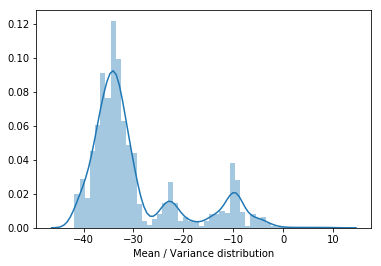

In [15]:
data2 = extract_from_file(FILE_NAME_2)
sns.distplot(data2['theta'], axlabel="Mean / Variance distribution")

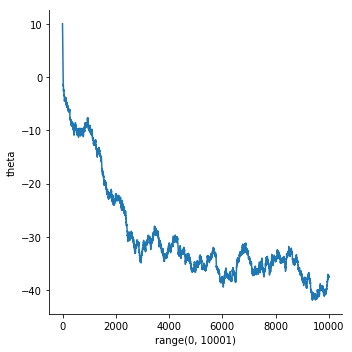

In [16]:
sns.relplot(x=range(len(data2['theta'])),y='theta', data=data2, kind='line', legend='brief')

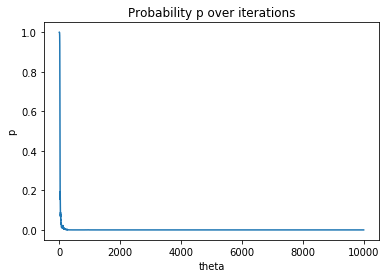

In [17]:
plot_p_from_abc(data2)